In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
import pandas as pd

X_train = pd.read_csv("C:/Documents/Files/input.csv").values
Y_train = pd.read_csv("C:/Documents/Files/labels.csv").values

X_test = pd.read_csv("C:/Documents/Files/input_test.csv").values
Y_test = pd.read_csv("C:/Documents/Files/labels_test.csv").values


In [4]:
X_train.shape

(1999, 30000)

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


In [6]:
X_train.shape

(1999, 100, 100, 3)

In [7]:
#SCALING
X_train = X_train/255.0
X_test = X_test/255.0

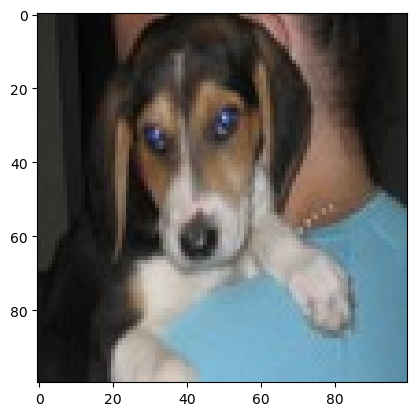

In [8]:
idx = random.randint(200, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')  # binary
])


C:\Users\Aasim\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5157 - loss: 0.7038
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6387 - loss: 0.6384
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7274 - loss: 0.5386
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7877 - loss: 0.4677
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8420 - loss: 0.3727


In [12]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6882 - loss: 0.6198


[0.6047443747520447, 0.7017543911933899]

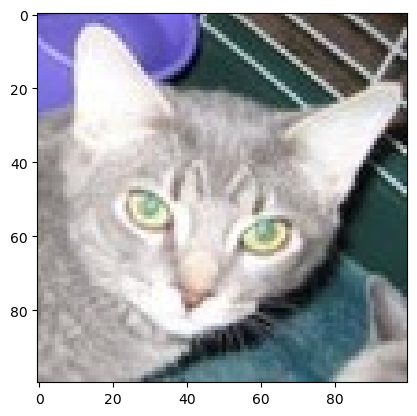

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[ True]]
Our model says it is a : cat


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
print(y_pred)

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)